In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")


In [2]:
print(df.head())
print(df.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

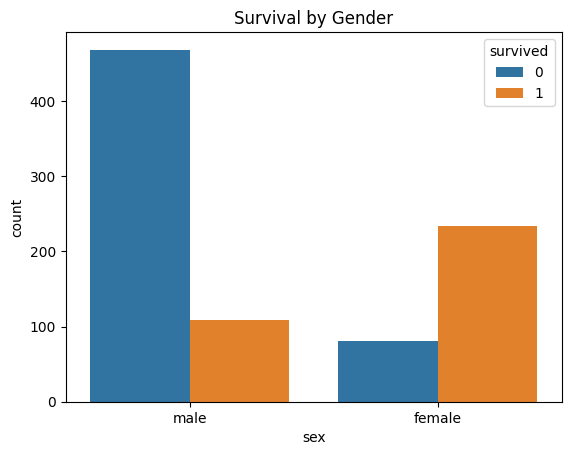

In [3]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()


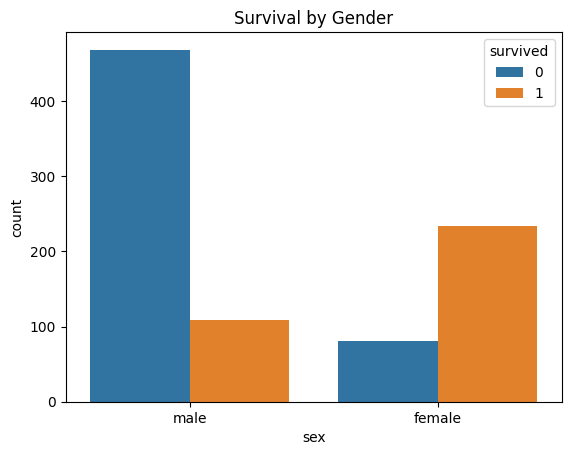

In [4]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()


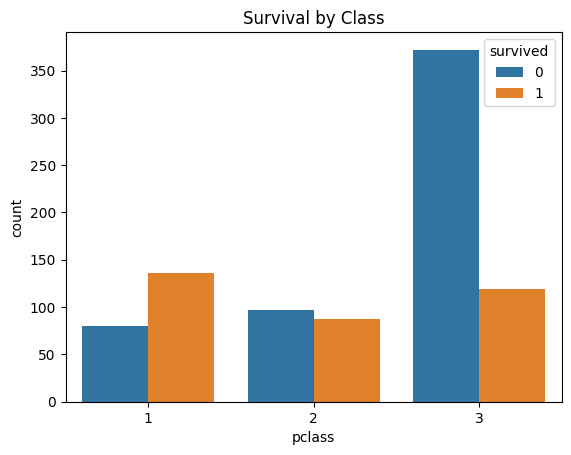

In [5]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Class")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

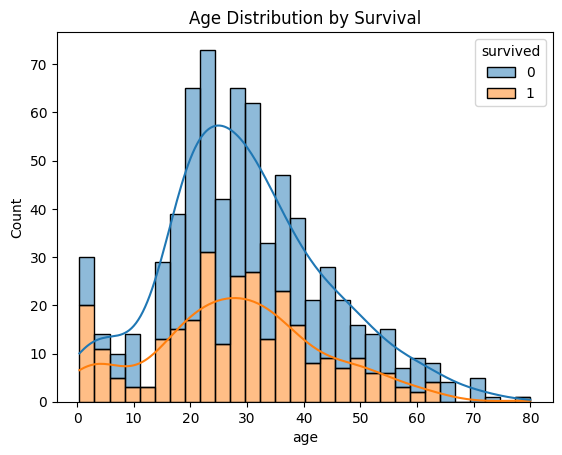

In [6]:
sns.histplot(data=df, x="age", bins=30, kde=True, hue="survived", multiple="stack")
plt.title("Age Distribution by Survival")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

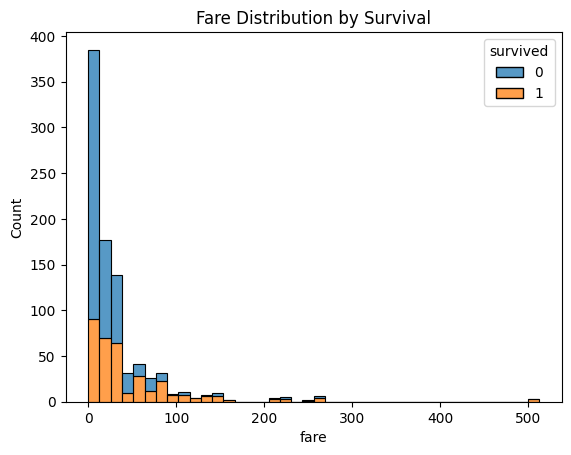

In [7]:
sns.histplot(data=df, x="fare", bins=40, hue="survived", multiple="stack")
plt.title("Fare Distribution by Survival")
plt.show()


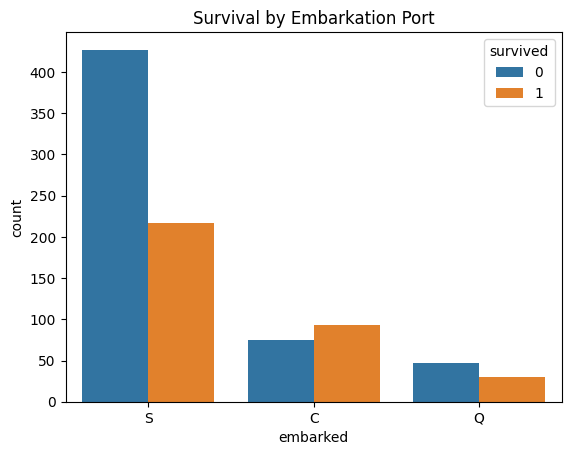

In [8]:
sns.countplot(x="embarked", hue="survived", data=df)
plt.title("Survival by Embarkation Port")
plt.show()


In [9]:
# Fill missing age with mean
df["age"] = df["age"].fillna(df["age"].mean())

# Fill missing embarked with mode
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])


In [10]:
# Convert 'sex' to numeric: male = 0, female = 1
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Convert 'embarked' to numeric: C = 0, Q = 1, S = 2
df["embarked"] = df["embarked"].map({"C": 0, "Q": 1, "S": 2})


In [11]:
# Feature columns
X = df[["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]

# Target column
y = df["survived"]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(max_iter=200)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
from sklearn.metrics import accuracy_score

# Predictions
pred_lr = lr.predict(X_test)
pred_knn = knn.predict(X_test)
pred_dt = dt.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print("KNN Accuracy:", accuracy_score(y_test, pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dt))


Logistic Regression Accuracy: 0.8100558659217877
KNN Accuracy: 0.7150837988826816
Decision Tree Accuracy: 0.7821229050279329
